In [40]:
csv_file_path="/home/avnish/iNeuron_Private_Intelligence_Limited/data_science_project_revamp/housing_prediciton/housing/artifact/data_ingestion/2022-05-06-20-10-16/raw_data/housing.csv"

In [41]:
import pandas as pd

In [42]:
housing= pd.read_csv(csv_file_path)

FileNotFoundError: [Errno 2] No such file or directory: '/home/avnish/iNeuron_Private_Intelligence_Limited/data_science_project_revamp/housing_prediciton/housing/artifact/data_ingestion/2022-05-06-20-10-16/raw_data/housing.csv'

In [43]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3.0


In [44]:
housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity', 'income_cat'],
      dtype='object')

In [45]:
import numpy as np

In [46]:
housing[["median_income"]]

,median_income
0,8.3252
1,8.3014
2,7.2574
3,5.6431
4,3.8462
...,...
20635,1.5603
20636,2.5568
20637,1.7000
20638,1.8672


In [47]:
import matplotlib.pyplot as plt

In [48]:
housing["income_cat"] = np.ceil(housing["median_income"] / 1.5)
housing["income_cat"].where(housing["income_cat"] < 5, 5.0, inplace=True)

In [49]:
housing["income_cat"].value_counts()

3.0    7236
2.0    6581
4.0    3639
5.0    2362
1.0     822
Name: income_cat, dtype: int64

In [18]:
from pathlib import Path

7.5

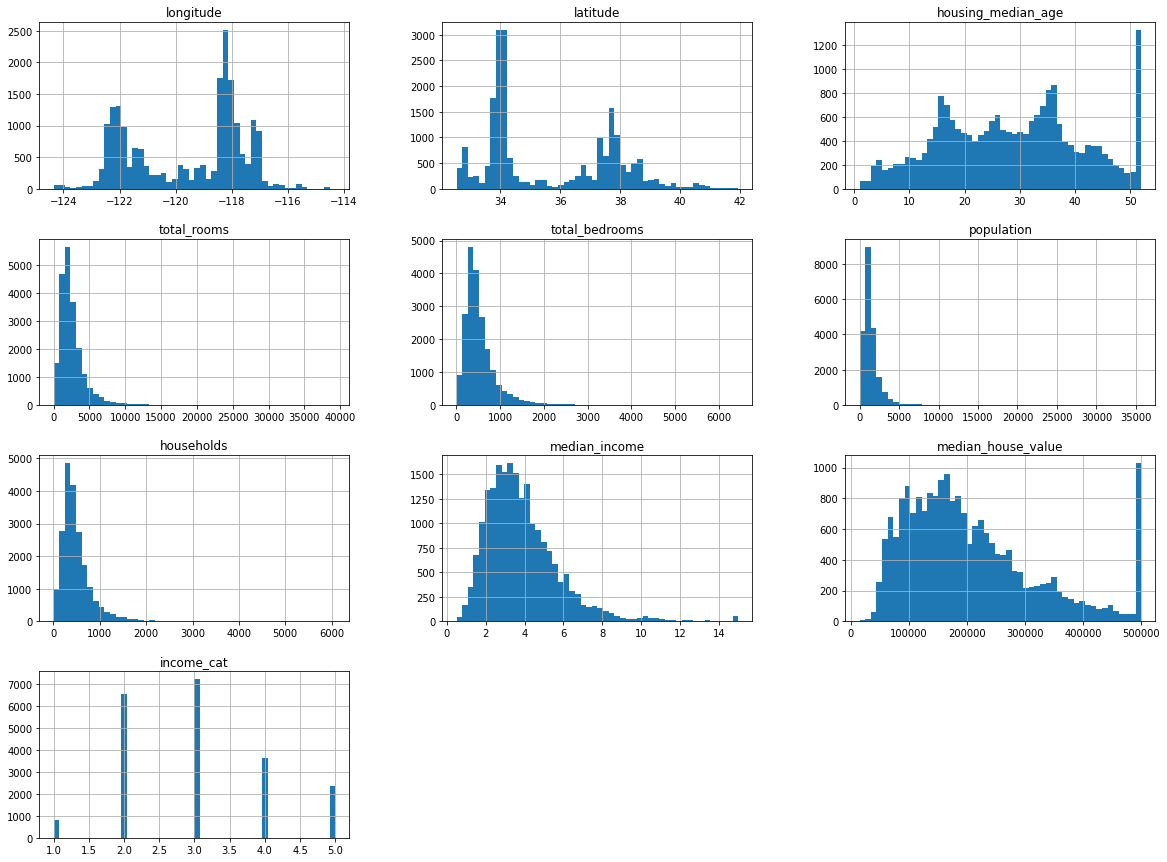

In [38]:
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
plt.show()

In [56]:
dict(zip(housing.columns,map(lambda x: str(x).replace("dtype('","").replace("')",""),housing.dtypes.values)))

{'longitude': 'float64',
 'latitude': 'float64',
 'housing_median_age': 'float64',
 'total_rooms': 'float64',
 'total_bedrooms': 'float64',
 'population': 'float64',
 'households': 'float64',
 'median_income': 'float64',
 'median_house_value': 'float64',
 'ocean_proximity': 'object',
 'income_cat': 'float64'}

In [59]:
housing['ocean_proximity'].astype('category')

0        NEAR BAY
1        NEAR BAY
2        NEAR BAY
3        NEAR BAY
4        NEAR BAY
           ...   
20635      INLAND
20636      INLAND
20637      INLAND
20638      INLAND
20639      INLAND
Name: ocean_proximity, Length: 20640, dtype: category
Categories (5, object): ['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN']

In [61]:
!pwd

/home/avnish/iNeuron_Private_Intelligence_Limited/data_science_project_revamp/housing_prediciton


In [62]:
from app_util import read_yaml_file

In [81]:
schema= read_yaml_file("schema.yaml")["columns"]

In [66]:
schema

{"longitude'": 'float',
 "latitude'": 'float',
 "housing_median_age'": 'float',
 "total_rooms'": 'float',
 "total_bedrooms'": 'float',
 "population'": 'float',
 "households'": 'float',
 "median_income'": 'float',
 "median_house_value'": 'float',
 "ocean_proximity'": 'category',
 "income_cat'": 'float'}

In [70]:
housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity', 'income_cat'],
      dtype='object')

In [72]:
schema.keys()

dict_keys(["longitude'", "latitude'", "housing_median_age'", "total_rooms'", "total_bedrooms'", "population'", "households'", "median_income'", "median_house_value'", "ocean_proximity'", "income_cat'"])

In [85]:
for column in housing.columns:
    if column in list(schema.keys()):
        housing[column].astype(schema[column])


In [96]:
from  sklearn.preprocessing import LabelBinarizer


In [98]:
LabelBinarizer().fit_transform(,column_name="ocean_proximity")

TypeError: fit_transform() got an unexpected keyword argument 'column_name'

In [99]:
label_binarizer = LabelBinarizer()

In [100]:
label_binarizer.fit(housing[["ocean_proximity"]])

LabelBinarizer()

In [103]:
pd.DataFrame(label_binarizer.transform(housing[["ocean_proximity"]],),columns=label_binarizer.classes_)

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0
...,...,...,...,...,...
20635,0,1,0,0,0
20636,0,1,0,0,0
20637,0,1,0,0,0
20638,0,1,0,0,0


In [104]:
##Adding new column to the dataframe

In [105]:
from sklearn.base import BaseEstimator, TransformerMixin

In [106]:
housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity', 'income_cat'],
      dtype='object')

In [117]:
from sklearn.preprocessing import SimpleImputer

ImportError: cannot import name 'SimpleImputer' from 'sklearn.preprocessing' (/home/avnish/iNeuron_Private_Intelligence_Limited/data_science_project_revamp/housing_prediciton/venv/lib/python3.7/site-packages/sklearn/preprocessing/__init__.py)

In [114]:
feature_generator = FeatureGenerator(add_bedrooms_per_room=False)

In [115]:
feature_generator.fit_transform(housing)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat,rooms_per_household,population_per_household
0,-122.23,37.88,41,880,129,322,126,8.3252,452600,NEAR BAY,5,6.98413,2.55556
1,-122.22,37.86,21,7099,1106,2401,1138,8.3014,358500,NEAR BAY,5,6.23814,2.10984
2,-122.24,37.85,52,1467,190,496,177,7.2574,352100,NEAR BAY,5,8.28814,2.80226
3,-122.25,37.85,52,1274,235,558,219,5.6431,341300,NEAR BAY,4,5.81735,2.54795
4,-122.25,37.85,52,1627,280,565,259,3.8462,342200,NEAR BAY,3,6.28185,2.18147
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374,845,330,1.5603,78100,INLAND,2,5.04545,2.56061
20636,-121.21,39.49,18,697,150,356,114,2.5568,77100,INLAND,2,6.11404,3.12281
20637,-121.22,39.43,17,2254,485,1007,433,1.7,92300,INLAND,2,5.20554,2.32564
20638,-121.32,39.43,18,1860,409,741,349,1.8672,84700,INLAND,2,5.32951,2.12321


In [119]:
from sklearn.impute import SimpleImputer

In [121]:
s=SimpleImputer()

In [123]:
housing_num = housing.drop("ocean_proximity",axis=1)

In [124]:
s.fit(housing_num)

SimpleImputer()

In [127]:
s.transform(housing_num)

array([[-1.2223e+02,  3.7880e+01,  4.1000e+01, ...,  8.3252e+00,
         4.5260e+05,  5.0000e+00],
       [-1.2222e+02,  3.7860e+01,  2.1000e+01, ...,  8.3014e+00,
         3.5850e+05,  5.0000e+00],
       [-1.2224e+02,  3.7850e+01,  5.2000e+01, ...,  7.2574e+00,
         3.5210e+05,  5.0000e+00],
       ...,
       [-1.2122e+02,  3.9430e+01,  1.7000e+01, ...,  1.7000e+00,
         9.2300e+04,  2.0000e+00],
       [-1.2132e+02,  3.9430e+01,  1.8000e+01, ...,  1.8672e+00,
         8.4700e+04,  2.0000e+00],
       [-1.2124e+02,  3.9370e+01,  1.6000e+01, ...,  2.3886e+00,
         8.9400e+04,  2.0000e+00]])

In [134]:
a=["a","b"]

In [132]:
a.index("b")

1

In [137]:
a.remove("b")

AttributeError: 'NoneType' object has no attribute 'remove'

In [138]:
a="avnish"

In [139]:
b="avnish"

In [142]:
a !=  b

False

In [143]:
a.__eq__(b)

True

In [146]:
np.array(housing['median_income'])

array([8.3252, 8.3014, 7.2574, ..., 1.7   , 1.8672, 2.3886])

In [147]:
x= np.array([[1,2],[1,2]])

In [148]:
x

array([[1, 2],
       [1, 2]])

In [150]:
y= np.array([1,1])

In [155]:
import numpy as np

array([[1, 2, 1],
       [1, 2, 1]])

In [ ]:
with open('test.npy', 'wb') as f:
    np.save(f, np.array([1, 2]))
    np.save(f, np.array([1, 3]))
with open('test.npy', 'rb') as f:
    a = np.load(f)
    b = np.load(f)

In [161]:
import dill

In [ ]:
dill.dump()

In [1]:
import numpy as np

In [1]:
from app_src import DataTransformation

In [2]:
file_path="/home/avnish/iNeuron_Private_Intelligence_Limited/data_science_project_revamp/housing_prediciton/housing/artifact/data_transformation/2022-05-07-21-10-42/transformed_data/train/housing_transformed.npy"
DataTransformation.load_numpy_array_data(file_path=file_path)

array([[-9.41350459e-01,  1.34743822e+00,  2.75635714e-02, ...,
         0.00000000e+00,  0.00000000e+00,  7.21000000e+04],
       [ 1.17178212e+00, -1.19243966e+00, -1.72201763e+00, ...,
         0.00000000e+00,  2.98691050e+00,  2.79600000e+05],
       [ 2.67581180e-01, -1.25971599e-01,  1.22045984e+00, ...,
         0.00000000e+00,  0.00000000e+00,  8.27000000e+04],
       ...,
       [-1.57079420e+00,  1.31001828e+00,  1.53856552e+00, ...,
         0.00000000e+00,  0.00000000e+00,  1.40400000e+05],
       [-1.56080303e+00,  1.24921090e+00, -1.16533270e+00, ...,
         0.00000000e+00,  0.00000000e+00,  2.58100000e+05],
       [-1.28105026e+00,  2.02567448e+00, -1.31489265e-01, ...,
         0.00000000e+00,  0.00000000e+00,  6.27000000e+04]])

In [3]:
import yaml

In [9]:
def write_yaml_file(file_path,data=None):
    try:
        with open(file_path,"w") as yaml_file:
            if data is not None:
                yaml.dump(data,yaml_file)
    except Exception as e:
        raise e


In [14]:
write_yaml_file("test.yaml",data)

In [15]:
data={"Avnish":"Yadav","Manish":["Yadav","Kumar"],"name":{"test":"y"}}

In [1]:
import os

In [12]:
max(folder_name)

20220508184855

In [2]:
from app_entity import HousingPredictor

In [3]:
housing_prediction = HousingPredictor(model_dir="saved_models")

In [5]:

file_path = "/home/avnish/iNeuron_Private_Intelligence_Limited/data_science_project_revamp/housing_prediciton/housing/artifact/data_ingestion/2022-05-08-19-12-18/raw_data/housing.csv"

In [6]:
import pandas as pd

In [7]:
df = pd.read_csv(file_path)

In [8]:
housing_prediction.predict(df)

array([405583.75878906, 431506.49609375, 377292.17285156, ...,
        36967.61914062,  48096.1796875 ,  64058.93164062])